In [10]:
import json
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import copy
from utils.utils import *

In [11]:
method_dict = {"MC": "Random Sample","random sample": "Random Sample", "surr ensemble": "ASE Class Score 0", "ASE": "ASE Class Score 0", "ASE_regression": "ASE Regression Score 0", 
               "ASE_all": "ASE All Score 0", "ASE_class_score_1": "ASE Class Score -1", "ASE_reg_score_1": "ASE Regression Score -1", "ASE_all_score_1": "ASE All Score -1", "MPL": "MPL"}
metric_dict = {'loss': 'Loss', 'mAP': 'mAP', "mAR_1000": "mAR"}
def add_entries(file):
    #columns=['active_test_type','sample_size','loss','mAP',"AP_50", "AP_75", "mAP_samll", "mAP_medium", "mAP_large", "mAR_1", "mAR_10", "mAR_1000", "mAR_small", "mAR_medium", "mAR_large"]
    with open(file, 'r') as openfile:
        json_object = json.load(openfile)
    df = None
    for key,value in json_object.items():
        if 'test_stats' in value.keys():
            del value['test_stats']
        value['active_test_type'] = method_dict[value['active_test_type']]
        # if value['sample_size'] < 180:
        #     continue
        temp_df = pd.DataFrame(value, index=[key])
        if df is None:
            df = temp_df
        else:
            df = df.append(temp_df,ignore_index=True)
    return df

In [12]:
def plot_figure(data, baseline_data, y_metric, x_label_name = "# of Acquired Images"):
    f = plt.figure(figsize=(10, 8))
    font_size = 25
    with sns.axes_style("darkgrid"):
        sns.lineplot(data=data, \
                     x='sample_size', y=y_metric, \
                     hue='active_test_type', errorbar=('ci', 100), lw=3)
    plt.plot([data['sample_size'][0], data['sample_size'][len(data['sample_size'])-1]], [baseline_data[y_metric], baseline_data[y_metric]], lw=3, label="Whole Data Set")
    plt.title("Active Testing", fontsize=30)
    plt.xlabel(x_label_name, fontsize=font_size)# x轴标签
    plt.ylabel(metric_dict[y_metric], fontsize=font_size)# y轴标签
    # pic_name = scenario+'.png'
    plt.legend(fontsize = 18)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.tight_layout()
    #plt.ylim(-1600,-800)
    #plt.savefig(pic_name,dpi=800)
    plt.show()
    
def plot_all_diff_precentage_figure(input_data, baseline_data, sample_nums, y_metric, x_label_name = "% of Acquired Images"):
    data = copy.deepcopy(input_data)
    f = plt.figure(figsize=(10, 8))
    font_size = 25
    data[y_metric] -= baseline_data[y_metric]
    data[y_metric] = data[y_metric] / baseline_data[y_metric] * 100
    data['sample_size'] = data['sample_size'] / sample_nums * 100
    with sns.axes_style("darkgrid"):
        sns.lineplot(data=data, \
                     x='sample_size', y=y_metric, \
                     hue='active_test_type', errorbar=('ci', 100), lw=3)
        
    x_line = [data['sample_size'][0], data['sample_size'][data['sample_size'].shape[0]-1]]
    y_line = [0, 0]
    plt.plot(x_line, y_line, 'r')
    plt.title("Active Testing", fontsize=30)
    plt.xlabel(x_label_name, fontsize=font_size)# x轴标签
    plt.ylabel("% Difference Rate to Full Test " + metric_dict[y_metric], fontsize=font_size)# y轴标签
    # pic_name = scenario+'.png'
    plt.legend(fontsize = 18)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.tight_layout()
    #plt.ylim(-1600,-800)
    #plt.savefig(pic_name,dpi=800)
    plt.show()

def plot_diff_figure(input_data, baseline_data, y_metric, x_label_name = "# of Acquired Images"):
    data = add_entries(input_data)
    f = plt.figure(figsize=(10, 8))
    font_size = 25
    data[y_metric] -= baseline_data[y_metric]
    with sns.axes_style("darkgrid"):
        sns.lineplot(data=data, \
                     x='sample_size', y=y_metric, \
                     hue='active_test_type', errorbar=('ci', 100), lw=3)
    plt.title("Active Testing", fontsize=30)
    plt.xlabel(x_label_name, fontsize=font_size)# x轴标签
    plt.ylabel(metric_dict[y_metric] + " diff", fontsize=font_size)# y轴标签
    # pic_name = scenario+'.png'
    plt.legend(fontsize = 18)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.tight_layout()
    #plt.ylim(-1600,-800)
    #plt.savefig(pic_name,dpi=800)
    plt.show()
    
def plot_diff_precentage_figure(data_path, baseline_data, y_metric, x_label_name = "# of Acquired Images"):
    data = add_entries(data_path)
    f = plt.figure(figsize=(10, 8))
    font_size = 25
    data[y_metric] -= baseline_data[y_metric]
    data[y_metric] = data[y_metric] / baseline_data[y_metric]
    with sns.axes_style("darkgrid"):
        sns.lineplot(data=data, \
                     x='sample_size', y=y_metric, \
                     hue='active_test_type', errorbar=('ci', 100), lw=3)
    plt.title("Active Testing", fontsize=30)
    plt.xlabel(x_label_name, fontsize=font_size)# x轴标签
    plt.ylabel(metric_dict[y_metric] + " Diff %", fontsize=font_size)# y轴标签
    plt.legend(fontsize = 18)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.tight_layout()
    plt.show()
    
def plot_diff_precentage_figure_comp(input_data, baseline_data, y_metric, x_label_name = "# of Acquired Images"):
    data = copy.deepcopy(input_data)
    f = plt.figure(figsize=(10, 8))
    font_size = 25
    data[y_metric] -= baseline_data[y_metric]
    data[y_metric] = data[y_metric] / baseline_data[y_metric]
    with sns.axes_style("darkgrid"):
        sns.lineplot(data=data, \
                     x='sample_size', y=y_metric, \
                     hue='active_test_type', errorbar=('ci', 100), lw=3)
    plt.title("Active Testing", fontsize=30)
    plt.xlabel(x_label_name, fontsize=font_size)# x轴标签
    plt.ylabel(metric_dict[y_metric] + " Diff %", fontsize=font_size)# y轴标签
    plt.legend(fontsize = 18)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.tight_layout()
    plt.show()

def read_baseline_data(data_path):
    with open(data_path, 'r') as openfile:
        none_swin_data = json.load(openfile)
    return none_swin_data["0"]

## Image based

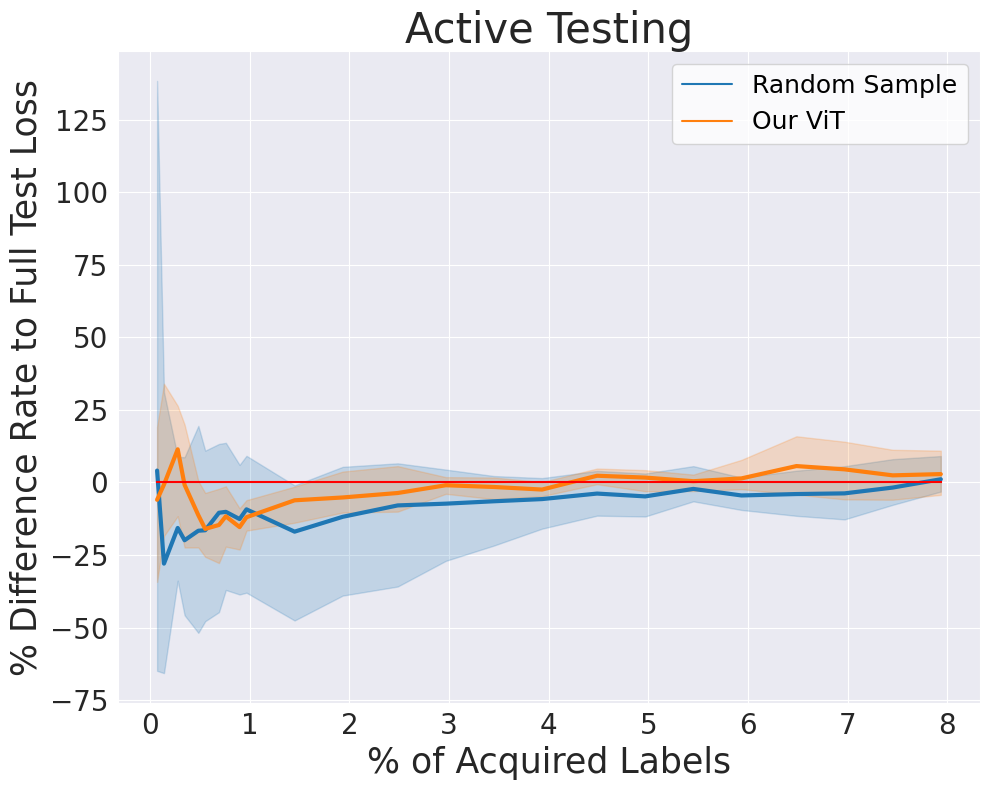

In [20]:
# PSPNet_VOC, UNet_COCO10k, UNet_VOC
model_dataset = "UNet_VOC"
base_path = f"./pro_data/{model_dataset}/val/"
sample_size_threshold = np_read(base_path + "image_true_losses.npy").shape[0]
method_dict = {"random sample": "Random Sample", "ViT": "Our ViT", "temp":"temp", 
               "MLP": "MLP", "ordinal": "ordinal", "ViT-region": "ViT-region", "ASE": "ASE"}
result_json_path = f"./results/{model_dataset}/image_based_active_testing/"
true_loss_estimation_path = result_json_path + "None.json"
test_whole_data = read_baseline_data(true_loss_estimation_path)
results = add_entries(result_json_path + "random_sample_3_runs.json")
# results =  results.append(add_entries(result_json_path + "ase_runs.json"),ignore_index=True)
results =  results.append(add_entries(result_json_path + "ViT_output_train_ordinal_runs_35000.json"),ignore_index=True)
plot_all_diff_precentage_figure(results, test_whole_data, sample_size_threshold, "loss", x_label_name = "% of Acquired Labels")

## 16x16 Region based

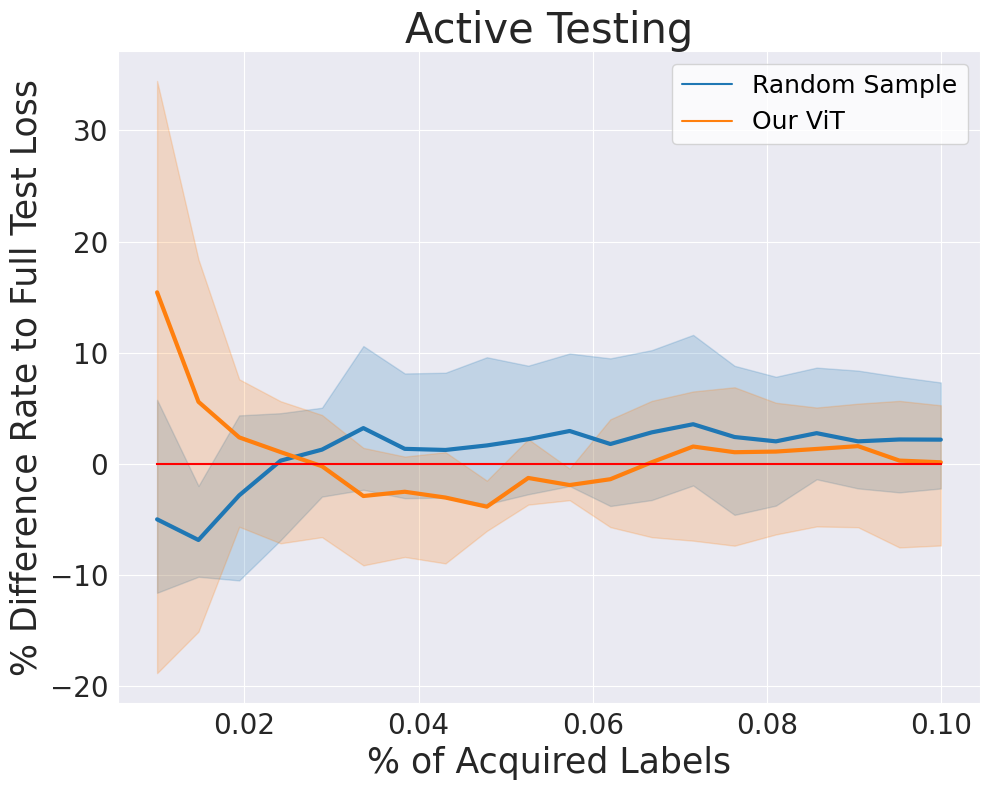

In [19]:
## 16x16 based
model_dataset = "UNet_VOC"
base_path = f"./pro_data/{model_dataset}/val/"
sample_size_threshold = np_read(base_path + "region_16_16_true_losses.npy").shape[0]
method_dict = {"random sample": "Random Sample", "ViT": "Our ViT", "temp":"temp", "MLP": "MLP", "ordinal": "ordinal", "ASE": "ASE"}
result_json_path = f"./results/{model_dataset}/region_16_16_active_testing/"
true_loss_estimation_path = result_json_path + "None.json"
test_whole_data = read_baseline_data(true_loss_estimation_path)
results = add_entries(result_json_path + "random_sample_3_runs.json")
# results =  results.append(add_entries(result_json_path + "ase_runs.json"),ignore_index=True)
results =  results.append(add_entries(result_json_path + "ViT_output_train_ordinal_runs_35000.json"),ignore_index=True)
plot_all_diff_precentage_figure(results, test_whole_data, sample_size_threshold, "loss", x_label_name = "% of Acquired Labels")

## 8x8 Region based

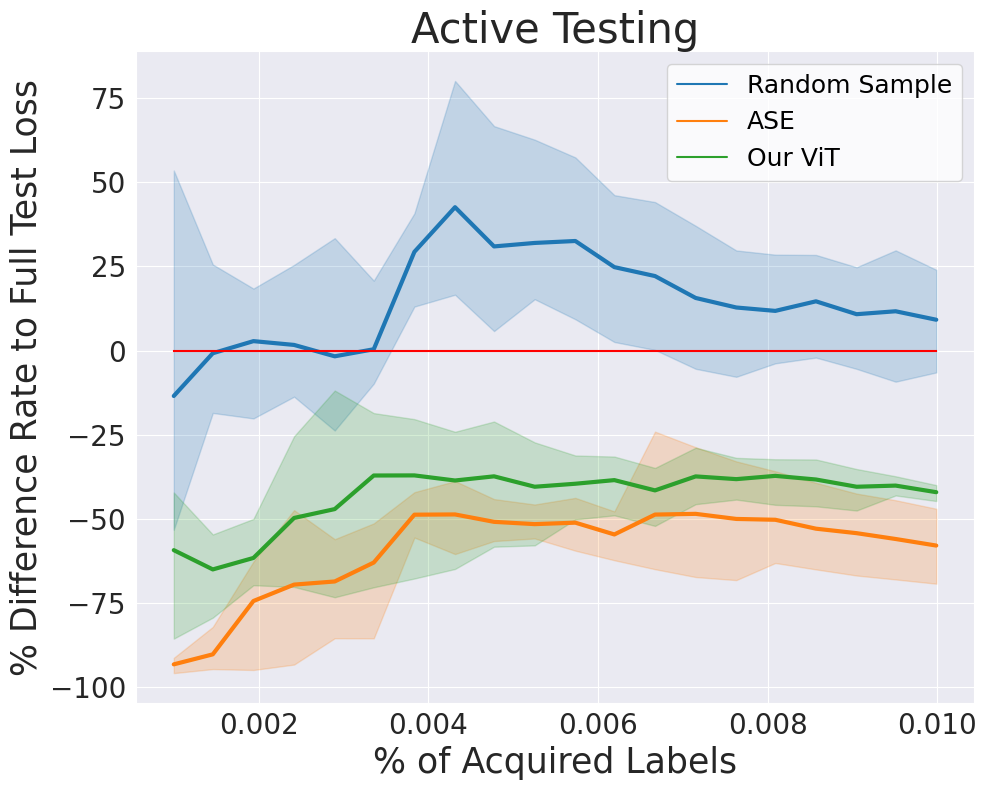

In [6]:
# 8 x 8
model_dataset = "PSPNet_VOC"
base_path = f"./pro_data/{model_dataset}/val/"
sample_size_threshold = np_read(base_path + "region_8_8_true_losses.npy").shape[0]
method_dict = {"random sample": "Random Sample", "ViT": "Our ViT", "temp":"temp", "MLP": "MLP", "ordinal": "ordinal", "ASE": "ASE"}
result_json_path = f"./results/{model_dataset}/region_8_8_active_testing/"
true_loss_estimation_path = result_json_path + "None.json"
test_whole_data = read_baseline_data(true_loss_estimation_path)
results = add_entries(result_json_path + "random_sample_3_runs.json")
results =  results.append(add_entries(result_json_path + "ase_runs.json"),ignore_index=True)
results =  results.append(add_entries(result_json_path + "ViT_output_train_ordinal_runs.json"),ignore_index=True)
plot_all_diff_precentage_figure(results, test_whole_data, sample_size_threshold, "loss", x_label_name = "% of Acquired Labels")